# SHAP（SHapley Additive exPlanations）
各入力特徴が予測にどの程度寄与しているかを定量的に示す手法


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# データ生成
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PyTorch Tensor に変換
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# シンプルなニューラルネットワーク
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 8)
        self.fc2 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# モデルの初期化
model = SimpleNN(input_dim=10)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# モデルの訓練
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.6567
Epoch [20/100], Loss: 0.5549
Epoch [30/100], Loss: 0.4373
Epoch [40/100], Loss: 0.3540
Epoch [50/100], Loss: 0.3163
Epoch [60/100], Loss: 0.3018
Epoch [70/100], Loss: 0.2951
Epoch [80/100], Loss: 0.2907
Epoch [90/100], Loss: 0.2868
Epoch [100/100], Loss: 0.2840


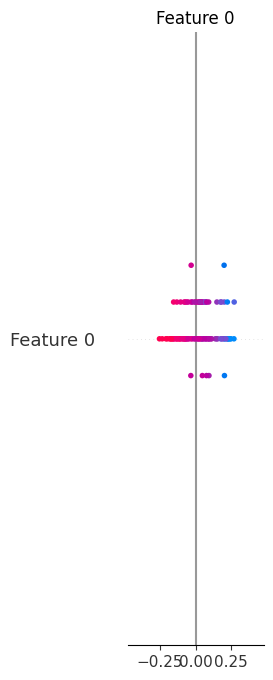

In [28]:
#SHAPの適用
background = X_train_tensor[:100]  # SHAPのベースライン用データ
explainer = shap.DeepExplainer(model, background)  # `DeepExplainer` を使う
shap_values = explainer.shap_values(X_test_tensor[:100])  # SHAP値を計算

# SHAPの可視化
shap.summary_plot(shap_values, X_test[:100])
